In [ ]:
!pip install --user xgboost

In [1]:
!pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
df_infer=pd.read_csv("data/GD_Part2_clean.csv")

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier, XGBRegressor

In [3]:
df_infer.head()

,Unnamed: 0,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [4]:
df_infer.set_index('CPR_NO', inplace=True)
# df_infer.index=df.CPR_NO
# df_infer.drop(["Unnamed: 0" ], axis=1, inplace=True)

In [5]:
df_infer.SCH_NM.nunique()

99

In [6]:
df_infer.head()

,Unnamed: 0,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,,
70913390,0,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
71105956,1,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
70712190,2,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
70207496,3,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
70507953,4,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [7]:
df_infer.drop(['TOTAL1','ACHIEVEMENTS2','MIDTERM2', 'FINAL2', 'TOTAL2', 'D_MARK', 'Unnamed: 0', "GPA"], axis=1, inplace=True)
# y=df_infer['NAT_class']

In [8]:
df_infer.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1', 'NAT_MARK'],
      dtype='object')

In [22]:
df_infer[df_infer.isna().any(axis=1)]

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,


In [10]:
df_infer.dropna(inplace=True)

In [11]:

label_encoder = LabelEncoder()

for i in ['SCH_NM', "PROV_NM"]:

    df_infer[i] = label_encoder.fit_transform(df_infer[i])

In [12]:
df_infer.Teacher_Gender=((df_infer.Teacher_Gender=="M")+0)
df_infer.SUBM=((df_infer.SUBM=="Math")+0)

In [13]:
df_infer.head()

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK
CPR_NO,,,,,,,,
70913390,0,0,0,1,28.0,17.0,45.0,53.7
71105956,0,0,0,1,27.0,14.0,41.5,49.7
70712190,0,0,0,1,27.0,13.0,27.5,52.1
70207496,0,0,0,1,26.0,15.0,44.0,52.9
70507953,0,0,0,1,25.0,14.0,31.5,52.1


In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from  scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [15]:
bins = [0, 60, 70, 80, 90, 100]
names = ['0-60', '60-70', '70-80', '80-90', '90-100']

df_infer['NAT_MARK'] = pd.cut(df_infer['NAT_MARK'], bins, labels=names)

In [16]:
df_infer["NAT_MARK"].value_counts()

0-60      19242
60-70      4023
70-80       692
80-90        33
90-100        0
Name: NAT_MARK, dtype: int64

In [17]:
df_infer.dropna(inplace=True)

In [19]:
df_infer=df_infer[[ 'NAT_MARK','SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1']]

In [73]:
df_infer.head()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,
70913390,0-60,0,0,0,1,28.0,17.0,45.0
71105956,0-60,0,0,0,1,27.0,14.0,41.5
70712190,0-60,0,0,0,1,27.0,13.0,27.5
70207496,0-60,0,0,0,1,26.0,15.0,44.0
70507953,0-60,0,0,0,1,25.0,14.0,31.5


In [20]:
df_infer.to_csv("data/inference_std.csv" , index=False)

In [21]:
! pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project


In [74]:
y=df_infer["NAT_MARK"]
X=df_infer.drop(['NAT_MARK'], axis=1)

In [75]:
column_trans=make_column_transformer(
(StandardScaler(), ['ACHIEVEMENTS1', 'MIDTERM1' , 'FINAL1']),
(OneHotEncoder(), ['PROV_NM', 'SCH_NM']),
   #PCA(n_components=.95, svd_solver="full"),
 remainder="passthrough")



In [76]:
pipe=make_pipeline( column_trans, 
                   #SVC()
XGBClassifier( objective="multi:softmax", seed=42, silent=True,nthread=-1)
                  )

In [77]:
pipe=make_pipeline( column_trans, 
                   #SVC()
                   
                  
                  XGBClassifier( objective="multi:softmax", seed=42, silent=True,nthread=-1)
                  )
                   

In [78]:
np.arange(1,100, 20)

array([ 1, 21, 41, 61, 81])

In [79]:
from scipy import stats as st

param_1={
    "svc__C":stats.expon(scale=100), 
    "svc__gamma":stats.expon(scale=.1),
    "svc__class_weight":["balanced", "None"]
    
    
 }
# A parameter grid for XGBoost
param_2 = {
    'xgbclassifier__n_estimators' :st.randint(100, 1000),
    'xgbclassifier__learning_rate' : st.uniform(0.01, 0.6), 
    'xgbclassifier__colsample_bytree': st.uniform(0.01, 0.9), 
    'xgbclassifier__max_depth': np.arange(3,8),
    'xgbclassifier__min_child_weight':[1,2,3,4],
    'xgbclassifier__max_depth':np.arange(3,8),
    "xgbclassifier__scale_pos_weight" :np.arange(1, 200, 20)
    
        }

In [80]:

X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=42,stratify = y, shuffle=True)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [81]:

skf = StratifiedKFold(n_splits=10 ,shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(pipe, param_distributions=param_2, scoring='f1_macro', n_jobs=-1, 
                                   cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.4min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x11a250f20>,
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('standardscaler',
                                                                               StandardScaler(copy=True,
                                                                                              with_mean=True,
                                                                                              with_std=True),
        

In [83]:
!pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project


In [84]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([46.2775182 ,  9.66182859, 40.9301249 , 16.26372902, 23.5452347 ,
       30.64657857, 10.18846092, 23.29540377, 45.01230369, 21.08651047]), 'std_fit_time': array([2.08240344, 0.12284015, 2.04022305, 1.29827625, 0.57919248,
       0.73090403, 0.61519321, 1.69096344, 6.62240084, 3.88344316]), 'mean_score_time': array([0.89818721, 0.17996764, 0.61485815, 0.15708163, 0.19141493,
       0.43907557, 0.16955287, 0.49898746, 0.84638846, 0.27932413]), 'std_score_time': array([0.17533103, 0.01941955, 0.08016395, 0.02021853, 0.02936606,
       0.03018909, 0.05981671, 0.27735749, 0.40313204, 0.14613219]), 'param_xgbclassifier__colsample_bytree': masked_array(data=[0.34708610696262626, 0.15041677639819287,
                   0.551003510568888, 0.010700889256912895,
                   0.016359674697745664, 0.05199909689225389,
                   0.5431731119758383, 0.06854643368675156,
                   0.2841523922560336, 0.5589969920043588],
             mas

In [89]:
y_train.head()

CPR_NO
70315329    0-60
71011617    0-60
70616426    0-60
70213348    0-60
70508437    0-60
Name: NAT_MARK, dtype: category
Categories (5, object): [0-60 < 60-70 < 70-80 < 80-90 < 90-100]

# Learning curve

In [90]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe, 
                                                    X=X_train, 
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ), scoring='f1_weighted',
                                                    
                                                    cv=10 , n_jobs=1)

KeyboardInterrupt: 

In [87]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")

# validation curves

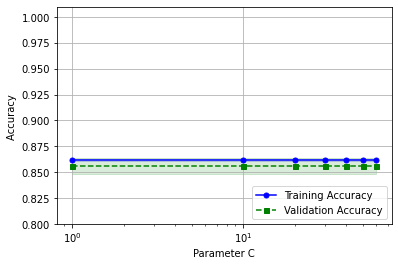

In [52]:
from sklearn.model_selection import validation_curve
param_range = [1, 10 , 20 , 30, 40 , 50, 60]
train_score, test_score =validation_curve(
    estimator=pipe, X=X_train, y=y_train, 
    param_name="xgbclassifier__scale_pos_weight", param_range=param_range, 
    cv=10,
    n_jobs=-1

)
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

# plt.plot(param_range, train_mean, 
#         color="blue", 
#          marker="o",
#          markersize=5, 
#          label="Training Accuracy "
#         )
plotGraph(param_range, train_mean, test_mean, train_std, test_std, "log", "Parameter C")

In [128]:
random_search.best_params_

{'xgbclassifier__colsample_bytree': 0.5589969920043588,
 'xgbclassifier__learning_rate': 0.5099169470416985,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 2,
 'xgbclassifier__n_estimators': 180,
 'xgbclassifier__scale_weight': 61}

In [127]:
clf=random_search.best_estimator_

In [19]:
pipe=make_pipeline( column_trans, 
XGBClassifier(colsample_bytree=0.31033775002511965,
 learning_rate= 0.09572009075316446,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 408))

In [138]:
xg_classifier=XGBClassifier(colsample_bytree=0.5589969920043588,
 learning_rate= 0.5099169470416985,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 180, scale_weight= 61)

In [139]:
xg_classifier.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_valid,y_valid)]) 

[0]	validation_0-merror:0.155422	validation_1-merror:0.158143
[1]	validation_0-merror:0.159828	validation_1-merror:0.161757
[2]	validation_0-merror:0.158161	validation_1-merror:0.161201
[3]	validation_0-merror:0.154171	validation_1-merror:0.15731
[4]	validation_0-merror:0.14905	validation_1-merror:0.152029
[5]	validation_0-merror:0.147681	validation_1-merror:0.148972
[6]	validation_0-merror:0.144703	validation_1-merror:0.14786
[7]	validation_0-merror:0.143691	validation_1-merror:0.14647
[8]	validation_0-merror:0.142559	validation_1-merror:0.145914
[9]	validation_0-merror:0.142202	validation_1-merror:0.144525
[10]	validation_0-merror:0.13982	validation_1-merror:0.144247
[11]	validation_0-merror:0.139642	validation_1-merror:0.144247
[12]	validation_0-merror:0.139522	validation_1-merror:0.143691
[13]	validation_0-merror:0.137617	validation_1-merror:0.142301
[14]	validation_0-merror:0.13726	validation_1-merror:0.14119
[15]	validation_0-merror:0.137438	validation_1-merror:0.142301
[16]	vali

[131]	validation_0-merror:0.115524	validation_1-merror:0.14119
[132]	validation_0-merror:0.115763	validation_1-merror:0.141745
[133]	validation_0-merror:0.115882	validation_1-merror:0.140912
[134]	validation_0-merror:0.115882	validation_1-merror:0.142023
[135]	validation_0-merror:0.115822	validation_1-merror:0.142023
[136]	validation_0-merror:0.115941	validation_1-merror:0.142301
[137]	validation_0-merror:0.116001	validation_1-merror:0.141467
[138]	validation_0-merror:0.115882	validation_1-merror:0.141745
[139]	validation_0-merror:0.115643	validation_1-merror:0.141467
[140]	validation_0-merror:0.115524	validation_1-merror:0.141745
[141]	validation_0-merror:0.114929	validation_1-merror:0.14119
[142]	validation_0-merror:0.114929	validation_1-merror:0.141467
[143]	validation_0-merror:0.115167	validation_1-merror:0.142023
[144]	validation_0-merror:0.114988	validation_1-merror:0.142023
[145]	validation_0-merror:0.114572	validation_1-merror:0.142023
[146]	validation_0-merror:0.114572	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5589969920043588, gamma=0,
              learning_rate=0.5099169470416985, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scale_weight=61,
              seed=None, silent=None, subsample=1, verbosity=1)

In [143]:
eval_result=xg_calssifier.evals_result()

In [144]:
t_round=range(len(eval_result["validation_0"]["merror"]))

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

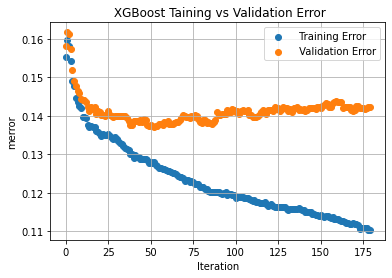

In [147]:
plt.scatter(t_round, eval_result["validation_0"]["merror"], label=" Training Error")
plt.scatter(t_round, eval_result["validation_1"]["merror"], label=" Validation Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("merror")
plt.title(" XGBoost Taining vs Validation Error")
plt.legend()
plt.show()



In [150]:
import xgboost as xgb

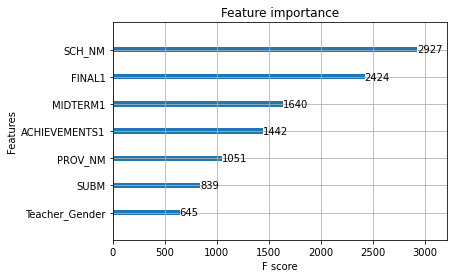

In [152]:
xgb.plot_importance(xg_classifier)

In [153]:
clf.score(X_test, y_test)

0.855515420950264

In [154]:
pd.crosstab(y_test, clf.predict(X_test))

col_0,0-60,60-70,70-80
NAT_MARK,,,
0-60,2716,155,3
60-70,260,341,21
70-80,8,67,22
80-90,1,2,3


In [162]:
scores=cross_val_score( clf, X, y,cv=5,  scoring="recall_macro")

In [163]:
print(f'CV Accuracy   {np.mean(scores):.3f} +/-  {np.std(scores)}')

CV Accuracy   0.606 +/-  0.053107044623640326


In [155]:
X_new=X.sample(5, random_state=42)
clf.fit(X, y )

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<clas

In [163]:
y_pred=clf.predict(X_test)
y_pred

array(['0-60', '0-60', '0-60', ..., '0-60', '60-70', '0-60'], dtype=object)

In [ ]:
cl=["0-60","60-70" "70-80", "80-90","90-100"]
np.array([ cl[x] for x in y_pred])

In [164]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

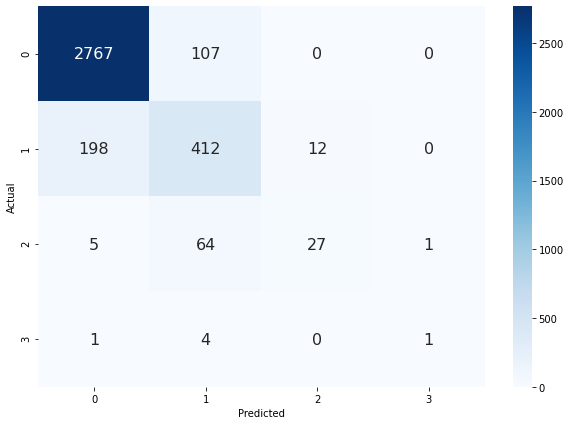

In [165]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")

In [164]:
from sklearn.model_selection import learning_curve

In [165]:
train_sizes, train_scores, test_scores= learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), 
                                                      cv=10, n_jobs=-1)

In [ ]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(train_sizes, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel("Accuracy")
plt.legend(loc="best")
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
param_range=[0.001, 0.01, 0.1,0.2, 0.6, 0.8,  1]
train_scores, test_scores= validation_curve(pipe, X_train, y_train, param_name='xgbclassifier__learning_rate',
                                            param_range=param_range, cv=10)
                                                   

plt.plot(param_range, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(param_range, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(param_range, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xscale('log')
plt.ylimit=([0.8, 1])
plt.show()

In [178]:
x = np.linspace(0, 10, 20)
y=x**3

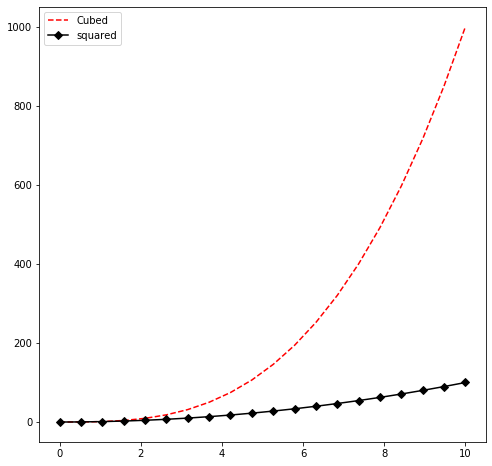

In [198]:
plt.figure(figsize=(8,8))
plt.plot(x,y, "--r", label="Cubed")
plt.plot(x, x**2, "D-k", label="squared")
plt.legend()

<BarContainer object of 4 artists>

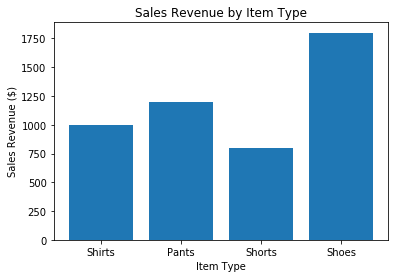

In [201]:
x = ['Shirts', 'Pants','Shorts','Shoes']
y = [1000, 1200, 800, 1800]
plt.title('Sales Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales Revenue ($)')
plt.bar(x, y)

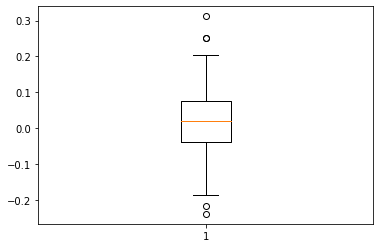

In [219]:
y = np.random.normal(loc=0, scale=0.1, size=100)
plt.boxplot(y)
plt.show()

In [222]:
from scipy.stats import shapiro
shap_w, shap_p = shapiro(y)
shap_w, shap_p

(0.9883351922035217, 0.5332409739494324)

In [224]:
from scipy.stats import zscore
y_z_scores = zscore(y)
y_z_scores

array([ 1.84985278,  0.59857334, -0.3655068 , -0.32830673, -0.45625589,
       -1.46301811, -2.06804379,  1.10111998,  0.53067051,  0.65337857,
        1.58216738, -0.67925651, -0.84107592,  0.88786471, -0.30885621,
       -1.59341962,  0.82134266, -2.38422976,  0.64571851,  0.55556519,
        0.57766206, -0.56996236, -0.00597515,  1.16435065, -0.26369217,
        0.4725421 ,  0.54416465,  0.32287113,  0.47121129, -0.54455489,
        0.31115413,  0.16904268, -0.27476562, -0.51786687, -0.61808481,
       -1.29094958,  1.05440174, -1.07983034,  0.57014901,  0.17254821,
       -0.53248268,  0.13444334,  0.9065548 ,  0.18005671,  0.33855   ,
       -2.60010946, -0.20293402,  0.79380344, -0.78623995, -0.50492544,
        0.68956566,  1.87391332, -1.02743568, -1.73285002, -0.89180849,
        0.08293444, -0.73717548,  0.42153779,  0.23147935,  0.37277941,
        0.02773516, -1.29767419, -0.01605787, -0.19999461, -0.10620994,
       -0.626005  ,  0.6500764 ,  0.46909196,  2.36890505,  0.16

In [45]:
def plotGraph(x, y1, y2, y1std, y2std, scl, lbl):    
    plt.plot(x, 
             y1, 
                     color="blue", marker="o", markersize=5, label="Training Accuracy")
    plt.fill_between(
        x, 
        y1 +y1std, 
        y1-y1std, 
                        color="blue", alpha=0.15)

    plt.plot(x, 
             y2, 
                     color="green", marker="s",linestyle="--", markersize=5, label="Validation Accuracy")
    plt.fill_between(
                    x, 
                    y2 +y2std, 
                    y2-y2std, 
                        color="green", alpha=0.15)

    plt.grid()
    plt.xlabel(lbl) #" Number of Training Example")
    plt.xscale(scl)
    plt.ylabel("Accuracy ")
    plt.legend(loc="lower right")
    plt.ylim([0.8, 1.01])
    plt.show()